In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

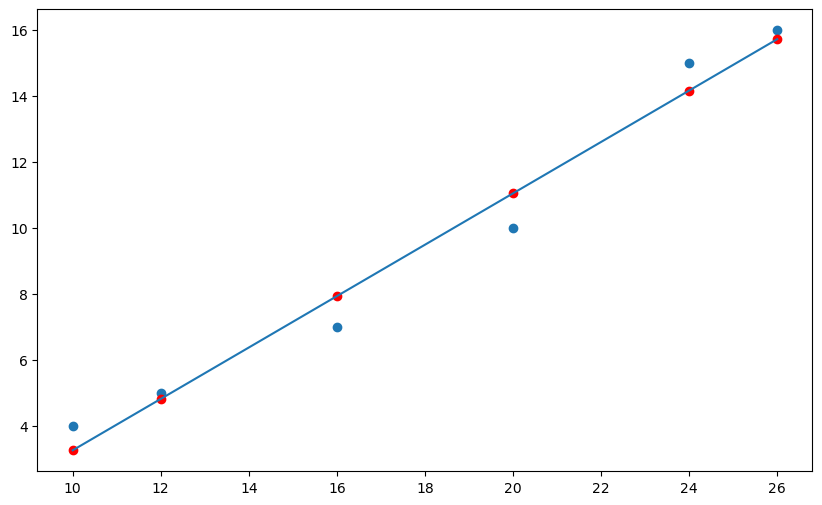

In [6]:
x = np.array([10,12,16,20,24,26]).reshape((-1,1))
y = np.array([4,5,7,10,15,16])
model = LinearRegression()
model.fit(x,y)
model = LinearRegression().fit(x,y)
y_pred = model.predict(x)
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.scatter(x,y_pred,color='r')
#reshape to have single column
x_seq = np.linspace(x.min(),x.max(),15).reshape((-1,1)) #-1 means variable length
plt.plot(x_seq,model.predict(x_seq))
plt.show()

In [13]:
from sklearn import tree
import numpy as np
features = ['color','width','height']
fruitnames=['apple','pear']
data=np.array([[10,5.3,4.8],
                [62,5.5,7.8],
                [85,5.7,4.9],
                [58,6.8,5.9],
                [15,8.6,7.7],
                [100,5.4,8.2],
                [22,5.8,5.6],
                [71,4.5,6.3]])
labels=np.array([0,1,0,1,0,1,0,1])
fruit_classifier = tree.DecisionTreeClassifier()
fruit_classifier = fruit_classifier.fit(data,labels)
predict = fruit_classifier.predict(np.array([[101,6.3,7.9],[25,4.5,3.8],[85,5.2,4.0]]))
list(map(lambda i: fruitnames[i],predict))
                                   

['pear', 'apple', 'apple']

[Text(0.4, 0.8333333333333334, 'height <= 5.75\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = apple'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = apple'),
 Text(0.6, 0.5, 'width <= 7.7\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = pear'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = pear'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = apple')]

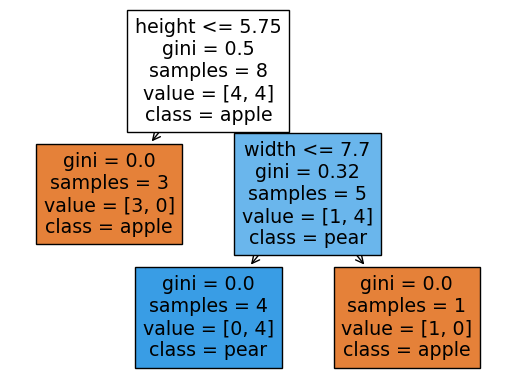

In [15]:
tree.plot_tree(fruit_classifier, feature_names=features, class_names=fruitnames,filled=True)

/tmp/ipykernel_14436/2783732624.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


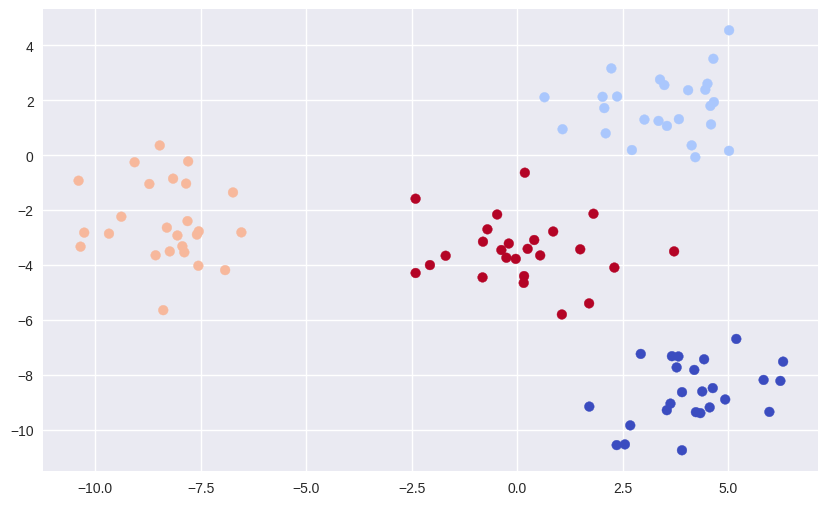

In [20]:
from pylab import plt
import numpy as np
import pandas as pd
plt.style.use('seaborn')
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
x, y  = make_blobs(n_samples = 100, centers=4, random_state=500, cluster_std=1.25)
model = KMeans(n_clusters=4, random_state = 0)
model.fit(x)
y_ = model.predict(x)
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='coolwarm')
#plt.scatter(x[:,0],x[:,1],c=y_,cmap='coolwarm')

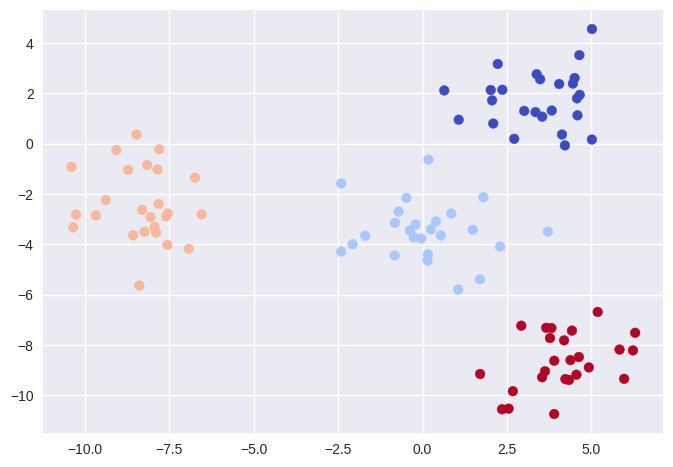

In [21]:
plt.scatter(x[:,0],x[:,1],c=y_,cmap='coolwarm')

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()


2023-08-04 02:40:56.863700: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 02:40:56.897322: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 02:40:56.898054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 02:40:57.707050: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [23]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [24]:
train_images = train_images.reshape((60000, 28*28))/255
test_images = test_images.reshape((10000,28*28))/255
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [27]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')
network.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2598 - accuracy: 0.9250
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1045 - accuracy: 0.9697
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9796
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9849
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9888
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0290 - accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0218 - accuracy: 0.9939
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0169 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0127 - accuracy: 0.9966
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9823

In [28]:
test_loss, test_acc

(0.06307625025510788, 0.9822999835014343)

In [35]:
import pandas_datareader as data
import yfinance as yf
yf.pdr_override()
data.get_data_yahoo('0066.HK', start='2021-01-01', end='2021-12-31')

TypeError: string indices must be integers

In [34]:
help(data.get_data_yahoo)

Help on function get_data_yahoo in module pandas_datareader.data:

get_data_yahoo(*args, **kwargs)

